# Linear Regression :  Bike Sharing Assignment

Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Essentially the company wants :

To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.
To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.
To know the accuracy of the model, i.e. How well those variables describe the bike demands
They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### Load required libraries

In [89]:
#Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Load data set

In [90]:
bike_df = pd.read_csv("day.csv")

In [91]:
# Glance at data
bike_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


 #### Data description :
    -instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [92]:
#Data information
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Columns basis data types:
- Numerical Columns in data : temp, atemp, hum, windspeed, casual, registered, cnt
- Categorical Columns in data: season,yr, mnth, holiday, weekday, workingday, weathersit
- Date Column : dteday

Target variable is 'cnt'

In [93]:
#Shape of data to determine number of rows and columns
bike_df.shape

(730, 16)

#### 730 rows and 16 columns are present in the data

In [94]:
#Checking for the null values in column data

bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### No null values are present in data

In [95]:
#Dropping duplicates if any and cheching the shape to get the count of rows dropped
bike_df.drop_duplicates(inplace=True)
bike_df.shape

(730, 16)

In [96]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike_df.shape

(730, 12)

#### Duplicate values are not present in the data

In [97]:
#Creating dataframe of numerical variables as per data defintion in data dictionary to visualise data 
df_num = bike_df[['cnt', 'temp', 'windspeed', 'hum','atemp']]

### Data Visualisation of Numeric Data

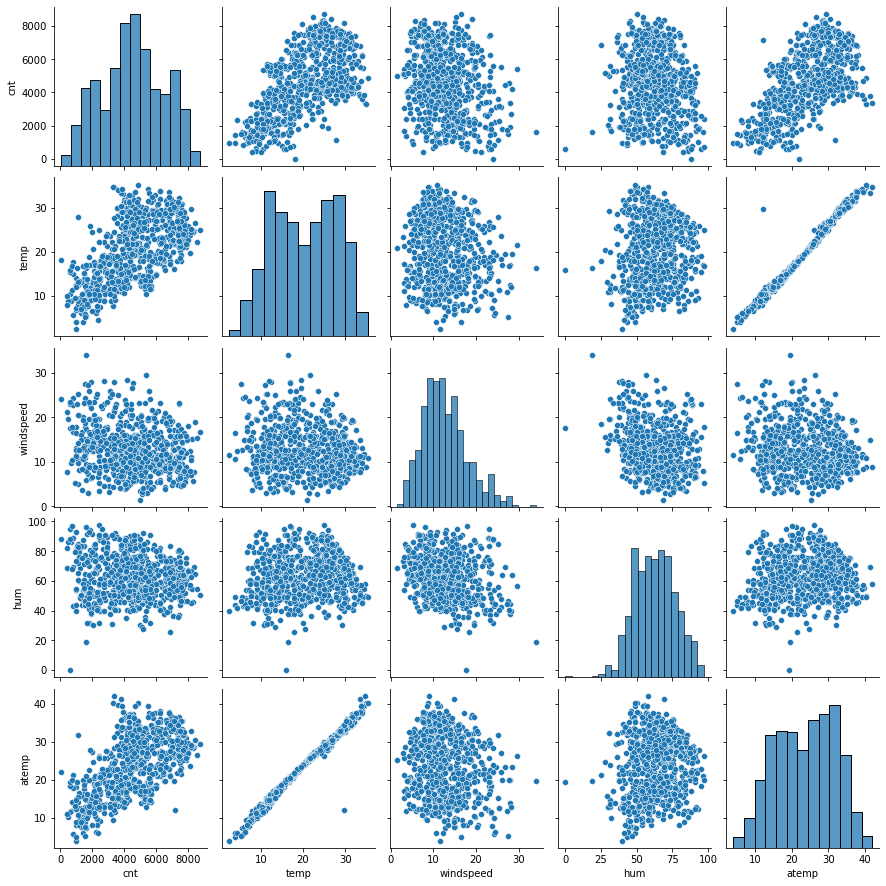

In [98]:
sns.pairplot(df_num)
plt.show()

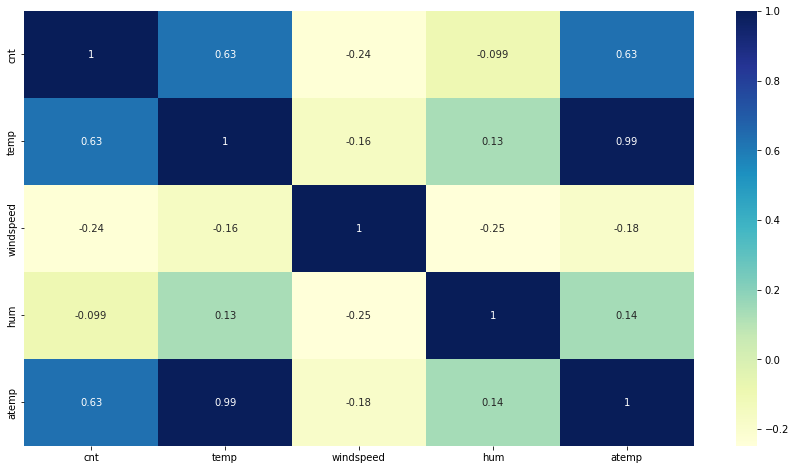

In [99]:
#Heatmap for co-relation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df_num.corr(),cmap="YlGnBu",annot = True)
plt.show()

####  Observations from numerical data :-
     It is observed that there is a high co-relation between temp & atemp.
     Correlation of target variable 'cnt' with both temp and atemp is same.

In [100]:
# Dropping the atemp column as it is highly correlated to temp
bike_df.drop('atemp',axis=1,inplace=True)

### Categorical variable mapping from numeric value to categorical value

In [101]:
# Converting numerical value of categorical variables into their respectinve categoraical value so dummy variables may be created
bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df["weekend"] = bike_df["weekday"].apply(lambda x: 0 if 1<=x<=5 else 1)
bike_df.mnth = bike_df.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon', 2:'tue', 3:'wed', 4:'thur',5:'fri',6:'sat'}) 
bike_df.weathersit = bike_df.weathersit.map({1:'clear', 2:'mist', 3:'light_rain_snow', 4:'heavy_rain_snow'})
bike_df.yr = bike_df.yr.map({0:'2018',1:'2019'})

In [102]:
bike_df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekend
0,spring,2018,jan,0,sat,0,mist,14.110847,80.5833,10.749882,985,1
1,spring,2018,jan,0,sun,0,mist,14.902598,69.6087,16.652113,801,1
2,spring,2018,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349,0


### Data Visualisation of the categorical data

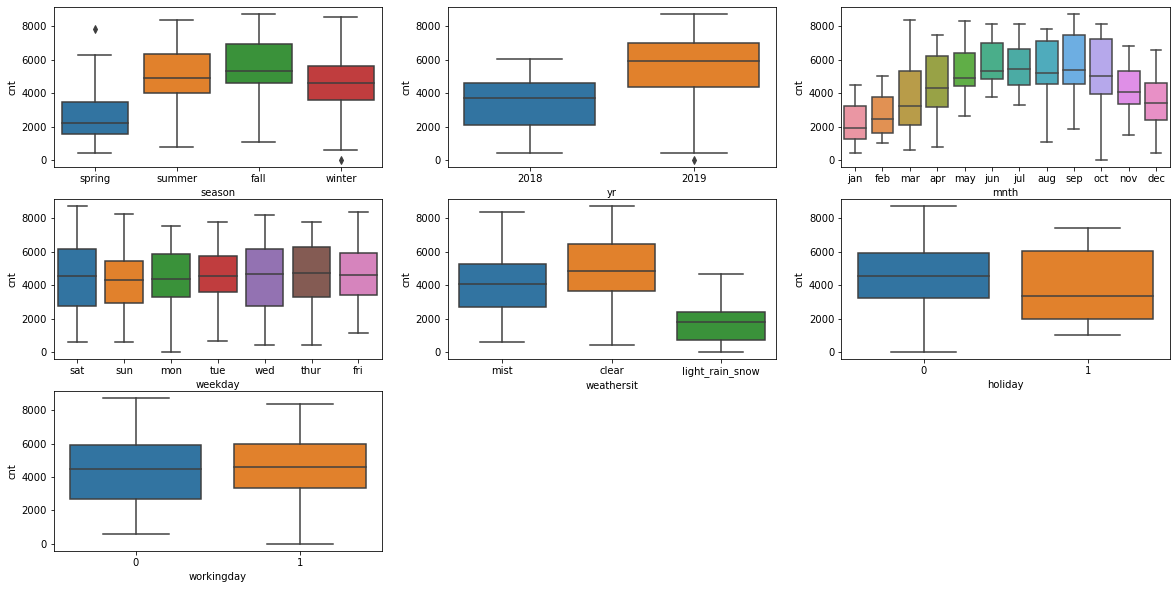

In [103]:
#Boxplot of saseon and target variable
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x='weekday',y='cnt',data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x='weathersit',y='cnt',data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x='holiday',y='cnt',data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x='workingday',y='cnt',data = bike_df)

plt.show()


#### Observation from categorical variables :-
       - Demand is high in fall season followed by summer season
       - Demand is high in year 2019 as compared to year 2018
       - Demand increases from month March to June and then decline slighly in August and then again increases in Sep & Oct.
       - During weekday there is not much variation in demand of bikes.
       - Clear weathersit has highest demand
       - On holiday demand is less 
       - Working day have marginally higher demand then non-working day which is also as same stated by holiday graph
     

## Data Preparation 

In [104]:
# Creating Dummy cariables from the categorical vraiables
mnth_df = pd.get_dummies(bike_df.mnth,drop_first=True)
weekday_df = pd.get_dummies(bike_df.weekday,drop_first=True)
weathersit_df = pd.get_dummies(bike_df.weathersit,drop_first=True)#First column is not dropped so we have all information about weather
season_df = pd.get_dummies(bike_df.season,drop_first=True)
yr_df = pd.get_dummies(bike_df.yr,drop_first=True)

In [110]:
#Merging the dummies dataframe with the main dataframe
df_new = pd.concat([bike_df,mnth_df,weekday_df,weathersit_df,season_df,yr_df],axis=1)

In [111]:
df_new.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,sun,thur,tue,wed,light_rain_snow,mist,spring,summer,winter,2019
0,spring,2018,jan,0,sat,0,mist,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,1,0,0,0
1,spring,2018,jan,0,sun,0,mist,14.902598,69.6087,16.652113,...,1,0,0,0,0,1,1,0,0,0
2,spring,2018,jan,0,mon,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,0,0,0


In [112]:
#Dropping variables from which dummy variable have been created.
df_new.drop(['season','weekday','weathersit','mnth','yr'],axis=1,inplace=True)

In [113]:
df_new.head(3)

,holiday,workingday,temp,hum,windspeed,cnt,weekend,aug,dec,feb,...,sun,thur,tue,wed,light_rain_snow,mist,spring,summer,winter,2019
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Splitting data into train and test sets

In [114]:
# Creating train and test set with train having 80 % data and test having 20% data
df_train,df_test= train_test_split(df_new,train_size = 0.8,random_state=100)

In [115]:
df_train.shape

(584, 30)

In [116]:
df_test.shape

(146, 30)

In [117]:
# Scaling features - Using Min-Max Scaler
scaler = MinMaxScaler()

#Scaling the columns with numerical values 
df_num = bike_df[['cnt', 'temp', 'windspeed', 'hum']]
num_cols = df_num.columns
df_train[num_cols]= scaler.fit_transform(df_train[num_cols])

In [118]:
df_train.head(3)

,holiday,workingday,temp,hum,windspeed,cnt,weekend,aug,dec,feb,...,sun,thur,tue,wed,light_rain_snow,mist,spring,summer,winter,2019
367,0,1,0.113228,0.454701,0.695175,0.254717,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
648,0,1,0.468352,0.477458,0.299450,0.868385,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
44,0,1,0.443431,0.387290,0.807474,0.217556,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Building a linear model

In [119]:
y_train = df_train.pop('cnt')
X_train = df_train

In [120]:
# Taking all the variables initailly 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

In [121]:
model1 = sm.OLS(y_train, X_train_lm).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.29e-216
Time:                        01:52:47   Log-Likelihood:                 613.13
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2172      0.031      7.107      0.000       0.157       0.277
holiday             0.0324      0.021      1.546      0.123      -0.009       0.074
workingday          0.1242      0.013      9.314      0.000       0.098       0.150
temp                0.4480      0.042     10.610      0.000       0.365       0.531
hum                -0.1435      0.036     -3.977      0.000      -0.214      -0.073
windspeed          -0.1816      0.024     -7.654      0.000      -0.228      -0.135
weekend             0.0606      0.010      6.199      0.000       0.041       0.080
aug                 0.0166      0.031      0.539      0.590      -0.044       0.077
dec                -0.0521      0.031     -1.696      0.090      -0.112       0.008
feb                -0.0289      0.030     -0.952      0.342      -0.088       0.031
jan                -0.0592      0.031     -1.893      0.059      -0.121       0.002
jul                -0.0350      0.032     -1.095      0.274      -0.098       0.028
jun                 0.0090      0.022      0.404      0.686      -0.035       0.053
mar                 0.0026      0.023      0.111      0.912      -0.043       0.049
may                 0.0180      0.019      0.937      0.349      -0.020       0.056
nov                -0.0504      0.033     -1.512      0.131      -0.116       0.015
oct                 0.0128      0.032      0.396      0.692      -0.051       0.076
sep                 0.0770      0.029      2.635      0.009       0.020       0.134
mon                -0.0240      0.014     -1.697      0.090      -0.052       0.004
sat                 0.0606      0.008      7.396      0.000       0.044       0.077
sun              3.054e-05      0.008      0.004      0.997      -0.016       0.016
thur               -0.0095      0.014     -0.667      0.505      -0.038       0.019
tue                -0.0227      0.014     -1.589      0.113      -0.051       0.005
wed                -0.0071      0.014     -0.511      0.610      -0.034       0.020
light_rain_snow    -0.2636      0.025    -10.548      0.000      -0.313      -0.215
mist               -0.0593      0.010     -6.144      0.000      -0.078      -0.040
spring             -0.0558      0.027     -2.051      0.041      -0.109      -0.002
summer              0.0420      0.024      1.750      0.081      -0.005       0.089
winter              0.1089      0.025      4.420      0.000       0.061       0.157
2019                0.2292      0.007     31.107      0.000       0.215       0.244
==============================================================================
Omnibus:                      105.593   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.625
Skew:                          -0.880   Prob(JB):                     5.25

#### Inference : The first Model taking all the variables has lot of variables with p-value>0.05.Hence we will use Feature Selection Method RFE to select variables

### Feature Selection
We start with 15 variables.
We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [122]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [123]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [124]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekend', False, 9),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 5),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 12),
 ('mar', False, 15),
 ('may', False, 8),
 ('nov', True, 1),
 ('oct', False, 11),
 ('sep', False, 3),
 ('mon', False, 6),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thur', False, 13),
 ('tue', False, 7),
 ('wed', False, 14),
 ('light_rain_snow', True, 1),
 ('mist', True, 1),
 ('spring', True, 1),
 ('summer', False, 4),
 ('winter', True, 1),
 ('2019', True, 1)]

In [125]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'dec', 'jul',
       'nov', 'sat', 'sun', 'light_rain_snow', 'mist', 'spring', 'winter',
       '2019'],
      dtype='object')

In [126]:
X_train.columns[~rfe.support_]

Index(['weekend', 'aug', 'feb', 'jan', 'jun', 'mar', 'may', 'oct', 'sep',
       'mon', 'thur', 'tue', 'wed', 'summer'],
      dtype='object')

### Building model using statsmodel for the detailed statistics

In [127]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [128]:
X_train_lm = sm.add_constant(X_train_rfe)

In [129]:
#Building the linear models using statsmodels
model2 = sm.OLS(y_train, X_train_lm).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     228.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.33e-222
Time:                        01:52:56   Log-Likelihood:                 593.57
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     569   BIC:                            -1092.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2533      0.024     10.510      0.000       0.206       0.301
holiday             0.0003      0.019      0.018      0.986      -0.038       0.038
workingday          0.0977      0.009     11.378      0.000       0.081       0.115
temp                0.4739      0.029     16.148      0.000       0.416       0.531
hum                -0.1374      0.035     -3.878      0.000      -0.207      -0.068
windspeed          -0.1773      0.024     -7.466      0.000      -0.224      -0.131
dec                -0.0484      0.015     -3.237      0.001      -0.078      -0.019
jul                -0.0838      0.016     -5.354      0.000      -0.115      -0.053
nov                -0.0626      0.017     -3.676      0.000      -0.096      -0.029
sat                 0.1078      0.011     10.146      0.000       0.087       0.129
sun                 0.0474      0.011      4.442      0.000       0.026       0.068
light_rain_snow    -0.2578      0.025    -10.262      0.000      -0.307      -0.208
mist               -0.0589      0.010     -6.007      0.000      -0.078      -0.040
spring             -0.1196      0.014     -8.566      0.000      -0.147      -0.092
winter              0.0833      0.013      6.643      0.000       0.059       0.108
2019                0.2278      0.007     30.543      0.000       0.213       0.242
==============================================================================
Omnibus:                       89.467   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.791
Skew:                          -0.747   Prob(JB):                     2.86e-56
Kurtosis:                       5.878   Cond. No.                     2.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.8e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Inference : All variables have p-value<0.05 except holiday. Hence we will check the VIF for multicollinearity.

### Checking VIF for multicollinearity

In [130]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_lm.values, i), 2) for i in range(X_train_lm.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
1,holiday,inf
2,workingday,inf
9,sat,inf
10,sun,inf
3,temp,3.24
13,spring,2.72
14,winter,2.19
4,hum,1.94
12,mist,1.60
8,nov,1.59


In [131]:
# dropping atemp since its vif > 5 and also p-value>0.05
X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)

In [132]:
#Re-run the model after removing atemp varaible
X_train_lm = sm.add_constant(X_train_rfe)
model3 = sm.OLS(y_train, X_train_lm).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     228.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.33e-222
Time:                        01:53:08   Log-Likelihood:                 593.57
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     569   BIC:                            -1092.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2536      0.037      6.777      0.000       0.180       0.327
workingday          0.0973      0.023      4.249      0.000       0.052       0.142
temp                0.4739      0.029     16.148      0.000       0.416       0.531
hum                -0.1374      0.035     -3.878      0.000      -0.207      -0.068
windspeed          -0.1773      0.024     -7.466      0.000      -0.224      -0.131
dec                -0.0484      0.015     -3.237      0.001      -0.078      -0.019
jul                -0.0838      0.016     -5.354      0.000      -0.115      -0.053
nov                -0.0626      0.017     -3.676      0.000      -0.096      -0.029
sat                 0.1075      0.024      4.409      0.000       0.060       0.155
sun                 0.0471      0.024      1.938      0.053      -0.001       0.095
light_rain_snow    -0.2578      0.025    -10.262      0.000      -0.307      -0.208
mist               -0.0589      0.010     -6.007      0.000      -0.078      -0.040
spring             -0.1196      0.014     -8.566      0.000      -0.147      -0.092
winter              0.0833      0.013      6.643      0.000       0.059       0.108
2019                0.2278      0.007     30.543      0.000       0.213       0.242
==============================================================================
Omnibus:                       89.467   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.791
Skew:                          -0.747   Prob(JB):                     2.86e-56
Kurtosis:                       5.878   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference : All the variables are statistically significant as they have p-value <0.5

In [133]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,hum,30.50
1,temp,18.03
0,workingday,16.29
3,windspeed,4.59
8,sun,4.51
7,sat,4.40
11,spring,2.91
12,winter,2.82
10,mist,2.33
13,2019,2.08


In [134]:
# dropping hum since its vif > 5 and also p-value>0.05
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [135]:
#Re-run the model after removing atemp varaible
X_train_lm = sm.add_constant(X_train_rfe)
model4= sm.OLS(y_train, X_train_lm).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     238.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.37e-220
Time:                        01:53:12   Log-Likelihood:                 585.95
No. Observations:                 584   AIC:                            -1144.
Df Residuals:                     570   BIC:                            -1083.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1795      0.033      5.512      0.000       0.116       0.243
workingday          0.0976      0.023      4.210      0.000       0.052       0.143
temp                0.4467      0.029     15.486      0.000       0.390       0.503
windspeed          -0.1513      0.023     -6.561      0.000      -0.197      -0.106
dec                -0.0532      0.015     -3.532      0.000      -0.083      -0.024
jul                -0.0767      0.016     -4.874      0.000      -0.108      -0.046
nov                -0.0622      0.017     -3.606      0.000      -0.096      -0.028
sat                 0.1089      0.025      4.415      0.000       0.060       0.157
sun                 0.0455      0.025      1.851      0.065      -0.003       0.094
light_rain_snow    -0.2969      0.023    -12.750      0.000      -0.343      -0.251
mist               -0.0812      0.008    -10.135      0.000      -0.097      -0.065
spring             -0.1225      0.014     -8.679      0.000      -0.150      -0.095
winter              0.0764      0.013      6.082      0.000       0.052       0.101
2019                0.2317      0.007     30.977      0.000       0.217       0.246
==============================================================================
Omnibus:                       92.274   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.340
Skew:                          -0.763   Prob(JB):                     3.26e-59
Kurtosis:                       5.956   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
0,workingday,12.94
1,temp,12.13
2,windspeed,4.55
6,sat,3.69
7,sun,3.64
11,winter,2.61
10,spring,2.52
12,2019,2.07
5,nov,1.65
9,mist,1.57


In [137]:
# dropping workingday since its vif > 5 
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

In [138]:
#Re-run the model after removing workingday varaible
X_train_lm = sm.add_constant(X_train_rfe)
model5= sm.OLS(y_train, X_train_lm).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     249.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.06e-218
Time:                        01:53:14   Log-Likelihood:                 577.01
No. Observations:                 584   AIC:                            -1128.
Df Residuals:                     571   BIC:                            -1071.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2767      0.023     11.874      0.000       0.231       0.323
temp                0.4442      0.029     15.182      0.000       0.387       0.502
windspeed          -0.1529      0.023     -6.534      0.000      -0.199      -0.107
dec                -0.0556      0.015     -3.640      0.000      -0.086      -0.026
jul                -0.0773      0.016     -4.842      0.000      -0.109      -0.046
nov                -0.0702      0.017     -4.041      0.000      -0.104      -0.036
sat                 0.0151      0.011      1.407      0.160      -0.006       0.036
sun                -0.0481      0.011     -4.509      0.000      -0.069      -0.027
light_rain_snow    -0.2935      0.024    -12.428      0.000      -0.340      -0.247
mist               -0.0801      0.008     -9.853      0.000      -0.096      -0.064
spring             -0.1266      0.014     -8.867      0.000      -0.155      -0.099
winter              0.0766      0.013      6.009      0.000       0.052       0.102
2019                0.2313      0.008     30.482      0.000       0.216       0.246
==============================================================================
Omnibus:                      102.949   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.534
Skew:                          -0.846   Prob(JB):                     7.43e-67
Kurtosis:                       6.107   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
0,temp,4.46
1,windspeed,4.14
10,winter,2.35
11,2019,2.06
9,spring,1.76
4,nov,1.65
8,mist,1.51
2,dec,1.36
3,jul,1.31
5,sat,1.21


In [140]:
# dropping workingday since its vif > 5 
X_train_rfe = X_train_rfe.drop(['sat'], axis=1)

In [141]:
#Re-run the model after removing workingday varaible
X_train_lm = sm.add_constant(X_train_rfe)
model6= sm.OLS(y_train, X_train_lm).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     271.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          8.04e-219
Time:                        01:53:31   Log-Likelihood:                 576.00
No. Observations:                 584   AIC:                            -1128.
Df Residuals:                     572   BIC:                            -1076.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2796      0.023     12.034      0.000       0.234       0.325
temp                0.4434      0.029     15.145      0.000       0.386       0.501
windspeed          -0.1513      0.023     -6.470      0.000      -0.197      -0.105
dec                -0.0554      0.015     -3.623      0.000      -0.085      -0.025
jul                -0.0768      0.016     -4.807      0.000      -0.108      -0.045
nov                -0.0708      0.017     -4.070      0.000      -0.105      -0.037
sun                -0.0508      0.010     -4.837      0.000      -0.071      -0.030
light_rain_snow    -0.2935      0.024    -12.418      0.000      -0.340      -0.247
mist               -0.0802      0.008     -9.857      0.000      -0.096      -0.064
spring             -0.1268      0.014     -8.873      0.000      -0.155      -0.099
winter              0.0767      0.013      6.013      0.000       0.052       0.102
2019                0.2309      0.008     30.424      0.000       0.216       0.246
==============================================================================
Omnibus:                       98.559   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.252
Skew:                          -0.798   Prob(JB):                     2.33e-66
Kurtosis:                       6.142   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
0,temp,4.39
1,windspeed,4.10
9,winter,2.34
10,2019,2.06
8,spring,1.75
4,nov,1.65
7,mist,1.51
2,dec,1.36
3,jul,1.31
5,sun,1.18


#### Inference: model6 is selected as it has all variables with p value <0.05 and also all variables with VIF <5.
#### There is negligible diffrence in r2 and adjusted r2 values which shows no further variables are required to be removed from this model.

### Residual Analysis of the train data

In [143]:
y_train_pred = model6.predict(X_train_lm)

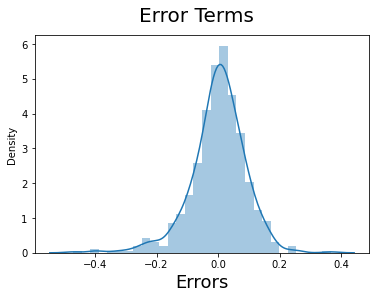

In [144]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

#### Inference: We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

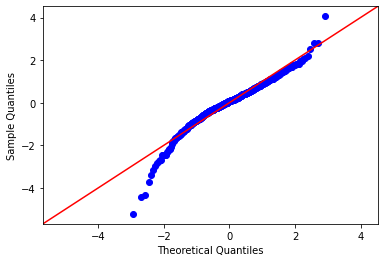

In [145]:
#Cross-verifying the above conclusion using a qq-plot as well:
#Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

#### Inference: Most of the data points lie on the straight line , hence the error terms are normally distributed .

### Making Predictions Using the Final Model

In [146]:
df_test

,holiday,workingday,temp,hum,windspeed,cnt,weekend,aug,dec,feb,...,sun,thur,tue,wed,light_rain_snow,mist,spring,summer,winter,2019
184,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
535,0,1,32.082500,59.2083,7.625404,6211,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
299,0,1,19.270000,81.2917,13.250121,2659,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
221,0,1,31.433347,42.4167,13.417286,4780,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
152,0,1,29.315000,30.5000,19.583229,4968,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,1,31.365000,59.2083,12.875725,4326,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
719,0,1,13.393347,55.6667,25.083661,3623,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
3,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
392,0,0,12.949153,54.3333,14.125543,4023,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [147]:
num_vars = ['cnt', 'temp', 'windspeed', 'hum']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [148]:
y_test = df_test.pop('cnt')
X_test = df_test

In [149]:
# Making predictions using the final model

X_test_lm = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = model6.predict(X_test_lm)

In [150]:
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.8393362203588888
r2_score of test dataset 0.7807875860839669


In [151]:
### Inference: r_squared on the test set is 0.780 and the r-squared on the trained set 0.839 which is quiet reasonable and which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

### Model Evaluation

Text(0, 0.5, 'y_test_pred')

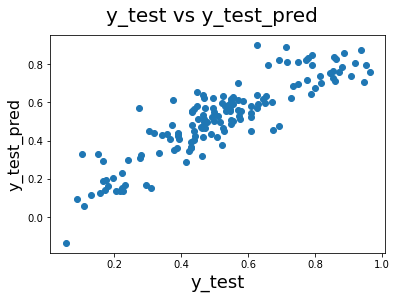

In [152]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          

plt.ylabel('y_test_pred', fontsize = 16)

In [153]:
#importing library and checking mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error :' ,mse)

Mean_Squared_Error : 0.009854798353926683


### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [154]:
param = pd.DataFrame(model6.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
1,temp,0.443418
0,const,0.279616
11,2019,0.230895
10,winter,0.076712
6,sun,-0.050752
3,dec,-0.055373
5,nov,-0.070807
4,jul,-0.076809
8,mist,-0.080177


#### Inference :All the positive coefficients like temp,yr-2019,winter indicate that an increase in these values will lead to an increase in the value of cnt.
#### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

## Based on final model top three features contributing significantly towards explaining the demand are:

#### Temperature (0.443)

#### weathersit : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (-0.293)

#### year-2019 (0.230)

## Key points from the above model:
#### Winter season has increase in demand.
#### It has been observed that the demand for bike rentals had gone up from 2018 to 2019. So we can say that it will go up year on year.
#### There is decline in demand in the months of July,Nov & Dec.
#### There is no much demand during the holidays
#### With an increase in temperature the demand also increases.